# Finding Heavy Traffic Indicators on I-94
In this project I'm going to analyze a dataset about the traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

The goal of my analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day or week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

Data Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

## The I-94 Traffic Dataset

In [6]:
import pandas as pd

traffic_data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [8]:
traffic_data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [25]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Each row describes traffic and weather data for a specific hour - we have data from 02.10.2012 09:00 to 30.09.2018 23:00.

The station, located about halfway between Minneapolis and St. Paul, records traffic data. For this station, the direction of the route is west (vehicles move from east to west). This means that the results of our analysis will concern westbound traffic near the station. In other words, we should not generalize our results to the entire I-94 route.

## Analyzing Traffic Volume

We are going to start our analysis by examining the distribution of the `traffic_volume` column.

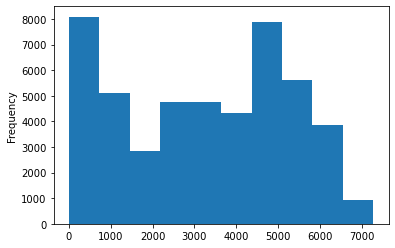

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline
traffic_data['traffic_volume'].plot.hist()
plt.show()

In [27]:
traffic_data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In the period from 09:00 02.10.2012 to 23:00 09.30.2018, the hourly traffic intensity ranged from 0 to 7280 vehicles, with an average of 3260 vehicles.

About 25% of the time, only 1193 vehicles or less passed through the station every hour — this likely occurs at night or during road construction. However, in about 25% of cases, the intensity of traffic was four times greater (4933 vehicles or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

## Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 to 19 (12 hours)
- Nighttime data: hours from 19 to 7 (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [38]:
traffic_data['date_time'] = pd.to_datetime(traffic_data['date_time'])

nighttime = traffic_data.copy()
nighttime = nighttime[(nighttime['date_time'].dt.hour < 7) | (nighttime['date_time'].dt.hour >= 19)]

daytime = traffic_data.copy()
daytime = daytime[(daytime['date_time'].dt.hour >= 7) & (daytime['date_time'].dt.hour < 19)]

## Traffic Volume: Day vs. Night (II)

We divided the dataset into two parts: `daytime` and `nighttime`.

Now we are going to compare the traffic volume at night and during day.

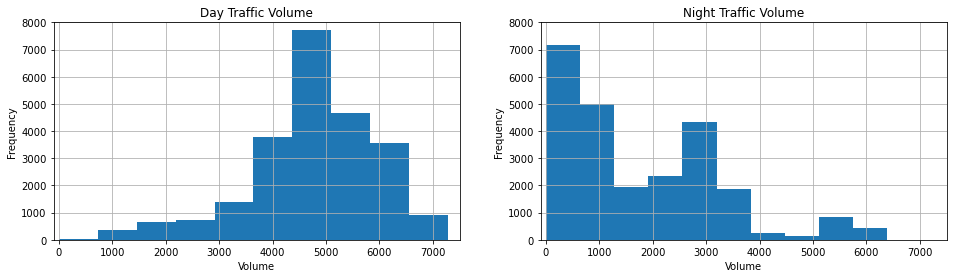

In [58]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
daytime['traffic_volume'].hist()
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Day Traffic Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
nighttime['traffic_volume'].hist()
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Night Traffic Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.show()

In [46]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [47]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram of Day Traffic Volume is left skewed. This means that most of the traffic volume values are high — there are 4252 or more cars passing the station each hour 75% of the time.

The histogram of Night Traffic Volume is right skewed. This means that most of the traffic volume values are low — there are 2819 or less cars passing the station each hour 75% of the time.

Although there are still measurements of over 5000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll focus only on the daytime data moving forward.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, day or time of day.

We're going to look at a few line plots showing how the traffic volume changes according to the following:
- Month
- Day of the week
- Time of day

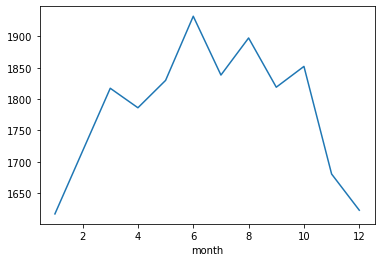

In [103]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

Looks like the traffic is less heavy during cold months (November–February) and more intense during warm months (March–October), with one significant exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To get to know if there's anything special about July and whether it occurs each year, let's check how the traffic volume changed yearly in July.

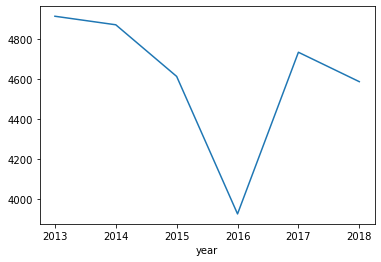

In [62]:
daytime['year'] = daytime['date_time'].dt.year
only_july = daytime[daytime['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Typically, July has pretty heavy traffic, similar to the other warm months. The only exception was 2016, which had a high decrease in traffic volume. Possibly, the reason could be road construction — [this googled article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) submits this idea.

So, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 4900 cars.

## Time Indicators (II)

We'll now continue with building line plots for another time unit: day of the week.

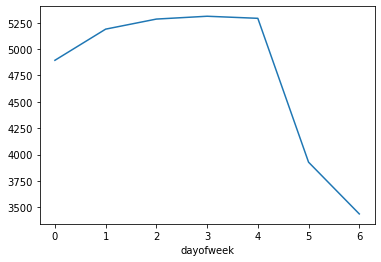

In [64]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()
# 0 is Monday, 6 is Sunday

Traffic volume is significantly heavier on business days compared to the weekends. Except for Monday, we only see values over 5000 during business days. Traffic is lighter on weekends, with values below 4000 cars.

## Time Indicators (III)

We'll now generate a line plot for the time of a day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.


In [68]:
daytime['hour'] = daytime['date_time'].dt.hour
business_days = daytime.copy()[daytime['dayofweek'] <= 4]  # 4 is Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5]  # 5 is Saturday

by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

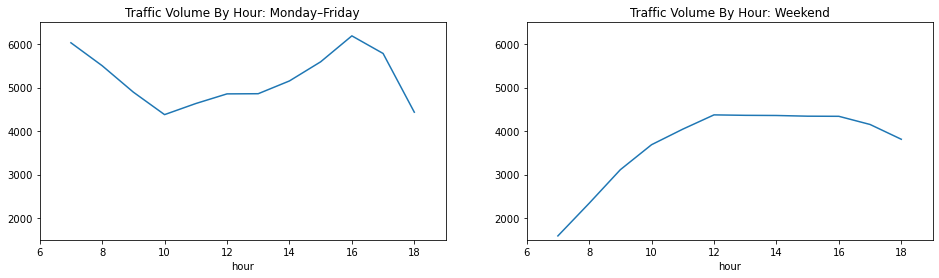

In [82]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6, 19)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6, 19)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6000 cars at rush hours.

So far, we've focused on finding time indicators for heavy traffic, and we reached the following conclusions:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical, so let's start by looking up their correlation values with `traffic_volume`.

In [87]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (`rain_1h`, `snow_1h`, `clouds_all`) don't show any strong correlation with `traffic_value`.

Let's generate a scatter plot to visualize the correlation between `temp` and `traffic_volume`.

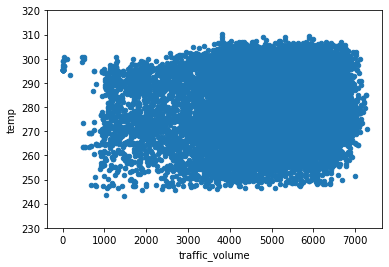

In [91]:
daytime.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic. We didn't find any reliable indicator of heavy traffic among numerical weather columns.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`.


## Weather Types

We're going to calculate the average traffic volume associated with each unique value in these two columns. 

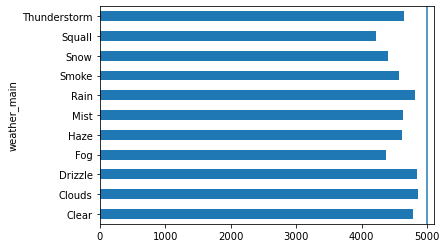

In [97]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.axvline(5000)
plt.show()

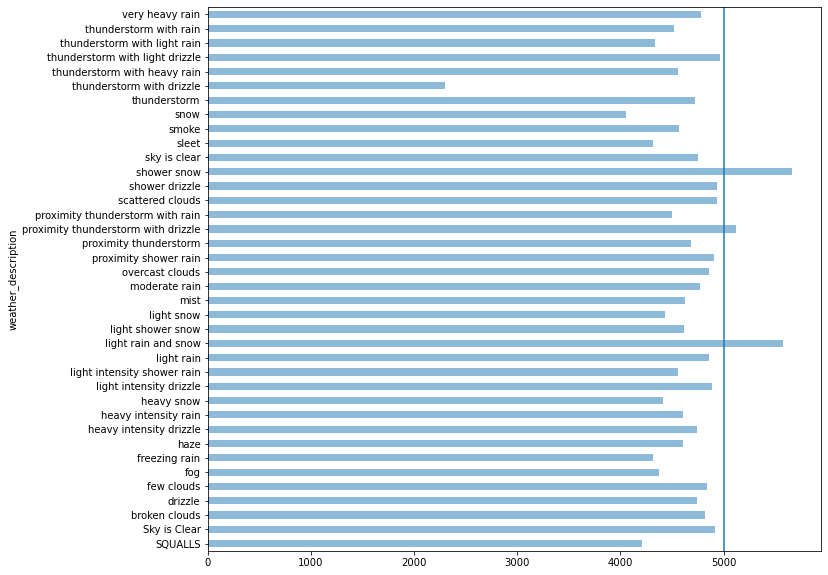

In [102]:
by_weather_description = daytime.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(11, 10), alpha=0.5)
plt.axvline(5000)
plt.show()

There are found three weather types where traffic volume exceeds 5000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7 and 16.
- Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle